## Gene Prediction (Cancer study)





In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers import Input, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
# Load RNAseq data
rnaseq_df = pd.read_csv('rnaseq.tsv.gz', index_col=0, sep="\t", low_memory=False)
rnaseq_df.iloc[:2,:5].head()

,RPS4Y1,XIST,KRT5,AGR2,CEACAM5
TCGA-02-0047-01,0.678296,0.289910,0.034230,0.0,0.0
TCGA-02-0055-01,0.200633,0.654917,0.181993,0.0,0.0


In [ ]:
numb_of_features = rnaseq_df.shape[1]

In [ ]:
# Train Test split
rnaseq_df_train, rnaseq_df_test = train_test_split(rnaseq_df, test_size=0.1, shuffle=True)
rnaseq_df_train.shape, rnaseq_df_test.shape

((9413, 5000), (1046, 5000))

In [ ]:
# size of encoded representations
encoding_dim = 100
numb_of_features = rnaseq_df.shape[1]

# Defining the 'Autoencoder' full model
autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim, activation="relu", input_shape=(numb_of_features, )))
autoencoder.add(Dense(numb_of_features, activation="sigmoid"))
autoencoder.compile(optimizer="adam", loss='mse')
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500100    
                                                                 
 dense_1 (Dense)             (None, 5000)              505000    
                                                                 
Total params: 1,005,100
Trainable params: 1,005,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
hist = autoencoder.fit(np.array(rnaseq_df_train), np.array(rnaseq_df_train),
                       shuffle=True,
                       epochs=10,
                       batch_size=50,
                       validation_split=0.2)

Epoch 1/10
151/151 [==============================] - 4s 23ms/step - loss: 0.0276 - val_loss: 0.0181
Epoch 2/10
151/151 [==============================] - 2s 16ms/step - loss: 0.0160 - val_loss: 0.0148
Epoch 3/10
151/151 [==============================] - 2s 16ms/step - loss: 0.0138 - val_loss: 0.0134
Epoch 4/10
151/151 [==============================] - 2s 16ms/step - loss: 0.0128 - val_loss: 0.0127
Epoch 5/10
151/151 [==============================] - 3s 17ms/step - loss: 0.0122 - val_loss: 0.0122
Epoch 6/10
151/151 [==============================] - 5s 30ms/step - loss: 0.0117 - val_loss: 0.0118
Epoch 7/10
151/151 [==============================] - 5s 34ms/step - loss: 0.0114 - val_loss: 0.0116
Epoch 8/10
151/151 [==============================] - 3s 17ms/step - loss: 0.0112 - val_loss: 0.0114
Epoch 9/10
151/151 [==============================] - 3s 17ms/step - loss: 0.0111 - val_loss: 0.0113
Epoch 10/10
151/151 [==============================] - 2s 16ms/step - loss: 0.0110 - val_lo

Text(0, 0.5, 'Reconstruction Loss')

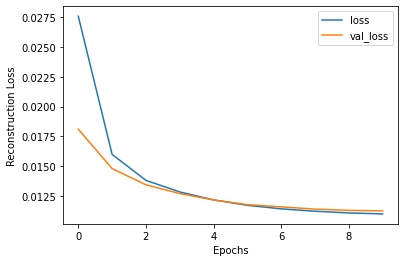

In [ ]:
# Visualize training performance
history_df = pd.DataFrame(hist.history)
ax = history_df.plot()
ax.set_xlabel('Epochs')
ax.set_ylabel('Reconstruction Loss')

In [ ]:
input_sample = rnaseq_df_test[:1]
input_sample

,RPS4Y1,XIST,KRT5,AGR2,CEACAM5,KRT6A,KRT14,CEACAM6,DDX3Y,KDM5D,...,FAM129A,C8orf48,CDK5R1,FAM81A,C13orf18,GDPD3,SMAGP,C2orf85,POU5F1B,CHST2
TCGA-25-1313-01,0.0,0.593375,0.314652,0.343061,0.221145,0.400767,0.359122,0.381197,0.0,0.0,...,0.476558,0.421561,0.365591,0.682961,0.487809,0.48051,0.680221,0.0,0.434945,0.41368


In [ ]:
# Test the prediction with small sample size
reconstruction = autoencoder.predict([input_sample])
reconstruction

1/1 [==============================] - 0s 87ms/step


array([[4.5068428e-04, 7.1631438e-01, 4.8991564e-01, ..., 3.9551899e-02,
        3.3937836e-01, 4.7531050e-01]], dtype=float32)

In [ ]:
# Reconstruct input RNAseq
reconstruction = autoencoder.predict(np.array(rnaseq_df))

reconstructed_df = pd.DataFrame(reconstruction, index=rnaseq_df.index,
                                columns=rnaseq_df.columns)

reconstructed_df.head()

327/327 [==============================] - 2s 7ms/step


,RPS4Y1,XIST,KRT5,AGR2,CEACAM5,KRT6A,KRT14,CEACAM6,DDX3Y,KDM5D,...,FAM129A,C8orf48,CDK5R1,FAM81A,C13orf18,GDPD3,SMAGP,C2orf85,POU5F1B,CHST2
TCGA-02-0047-01,0.685130,0.167675,0.197091,0.044913,0.031532,0.042335,0.054542,0.053896,0.708682,0.660106,...,0.455444,0.528025,0.761310,0.661237,0.603273,0.402871,0.418251,0.474663,0.200210,0.624761
TCGA-02-0055-01,0.341307,0.364887,0.241299,0.123855,0.072856,0.147664,0.149789,0.118537,0.340214,0.283441,...,0.548164,0.532443,0.596713,0.521877,0.648132,0.349160,0.525987,0.189343,0.192853,0.636856
TCGA-02-2483-01,0.882547,0.083486,0.138089,0.043783,0.020535,0.034959,0.050185,0.040610,0.871478,0.843177,...,0.356369,0.466696,0.757307,0.589341,0.515954,0.406350,0.461484,0.480321,0.232383,0.636203
TCGA-02-2485-01,0.759295,0.128651,0.178662,0.064531,0.031979,0.033561,0.047036,0.039832,0.768231,0.725701,...,0.471948,0.517247,0.699909,0.679854,0.635291,0.416702,0.453873,0.388923,0.204776,0.649452
TCGA-02-2486-01,0.751233,0.054390,0.172224,0.080739,0.028845,0.057392,0.064419,0.058409,0.751420,0.687458,...,0.588491,0.489202,0.591752,0.614320,0.674113,0.349600,0.456133,0.242562,0.172041,0.634217


In [ ]:
reconstruction_fidelity = reconstructed_df - rnaseq_df

gene_mean = reconstruction_fidelity.mean(axis=0)
gene_abssum = reconstruction_fidelity.abs().sum(axis=0).divide(rnaseq_df.shape[0])
gene_summary = pd.DataFrame([gene_mean, gene_abssum], index=['gene mean', 'gene abs(sum)']).T
gene_summary.sort_values(by='gene abs(sum)', ascending=False).head()

,gene mean,gene abs(sum)
PPAN-P2RY11,-0.004761,0.234352
GSTM1,-0.019004,0.218908
GSTT1,0.002986,0.218411
TBC1D3G,-0.026385,0.193931
RPS28,-0.025644,0.182480


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


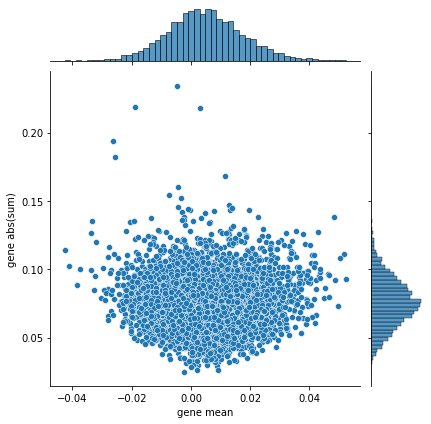

In [ ]:
# Mean of gene reconstruction vs. absolute reconstructed difference per sample
g = sns.jointplot('gene mean', 'gene abs(sum)', data=gene_summary)